## Context

Any one who started their Deep learning Journey will mostly start with MNIST or CIFAR 10 as their initial problem set. MNSIT might be very easy for most of the beginers since it is a very small dataset and easy to get good accuracy, with bit of optimizations you can easily acheieve top 10% result. 

**If you find this Kernal helpful , Please Upvote the notebook**. That will enchourage me a lot. Thank you :)

### **CIFAR 10**
I choose CIFAR 10 dataset to experiment my deep learning theory for the below reasons 

1. CIFAR 10 is a bit challenging since it has 60K images, which is a lot for a begginer.
2. The images are compressed so that they can be trained with less computational power.
3. CIFAR 10 is very popular so that if I was struck at some point I can easily get lot of help from community.
4. I dont need to deal with the hasle of downloading and handeling the data by writing python code. The data is readily available in keras datasets so that I can focus on the deep learning algorithm rather than the data cleaning. 

### **Keras**
I choose Keras as my deep learning framework since it is begginer friendly and the learning keras is very easy. Also lots and lots of online tutorials or articles are written in Keras so its easy to get out if you are struck somewhere. In this notebook you see me using tensorflow.keras instead of keras directly. Either ways its okay, feel free to use tensorflow.keras or keras directly .





## Import Data

We are going to import data directly from the Keras datasets instead of getting it from kaggle data, since keras already has the cleaned version of the same data so lets use it. 

The actual data contains 60K images, out of which they were divided into train data (x_train, y_train) and test data (x_test, y_test). We can directly unpack the data into respective variables as shown below.

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

## Normalization and One hot encoding

Since our data is ready we now need to normalize the data, since normalizing the images in deep learning will produce very good results. Normalizing means we are bringing all the values in the data into a common scale 0-1. This will make out model converge fast and also we will not have any distrotions in the data.

For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.

### One hot encoding.
CIFAR 10 has 10 categories, in general we should label the categorical data using the one hot encoding. If you are wondering what is one hot encoding please refer to the below article

Machine learning mastery [Link](http://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/#:~:text=That%20categorical%20data%20is%20defined,categorical%20data%20to%20integer%20data.)



In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [ ]:
# Importing the necessary libraries, which we may or may not use. Its always good idea to import them befor (if you remember) else we can do it at any point of time no problem.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Models

Lets try to train a basic deep learning model. Any deep learning modle that needs to classify images use Convolution neural network (CNN). CNN's are proven very effective on image data, also if we have enough data, we can make a deep neural network with multiple CNN layers arranged in specific design to create state of the art results. 

We will start with 2 basic CNN layers, where each layer is attached to a maxpool layer. Max pooling is a great way to reduce the size of parameters with out loosing much information. Asusual in any deep learning model we need to flatten the intermediate layers results and pass them to a Dense network. Then the dense network result will be passes to a final output layer where the number of units represent the number of categories in the data which is 10 in our case. Softmax is chosen as final activation because we need the highest probable class out of 10.

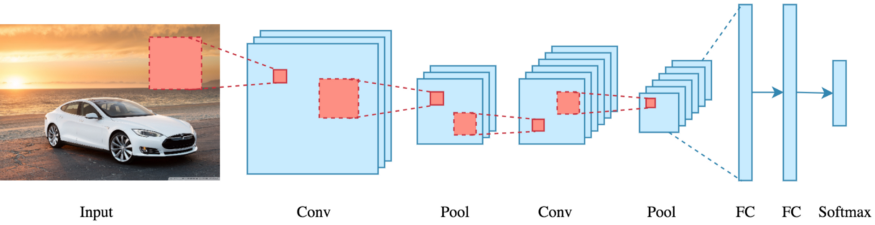

Finally compile your model using adam optimizer, feel free to use any RMS Prop and if you find it better please share your results. I am habbituated to use adam since I dont need to deal with tuning the learning rate.

Let us try to Sequentially build our models. Start from basic 2 convolution layers with a max pool layer after each. Slowly we will increase complexity.


## Base Model

two simple convolutonal layers with 32 filters each and input shape is 32*32*3 and activation will be relu

In [ ]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# history=model1.fit_generator(train_generator,epochs=50,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

In [ ]:

evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot()

Using our base model we are able to get 88% training accuracy and 65% test accuracy, which is not that great but still we use very simple model. We can perform lot of tweeks to acheive pretty good accuracy. If you observe the model training log above you can see that Validation loss is increasing a lot which means our model is overfitting. 

Overfitting means our model performs good on the training data set but fails to generalize on the unseen data. Lets try to reduce overfitting.

How to reduce Overfitting? If you google how to reduce overfitting, you will probably get answers like below.

1. Add more data
2. Decrease model complexity
3. Apply regularization

Option 1 and 2 are not a good fit in our case, since getting more data is very tough and out model is not that complex to reduce the architecture. So lets regularize the model. In deep learning drop out is very good form of regularization. Cool .. What is dropout?

> *Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.*

Ok I copied definition from machinelearning mastery [article](http://https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/). But what exactly is drop out? Drop out literally means we gonna drop some of the neural units randomly from our network, which forces the next layer to learn the patterns again. In this way our model will become more robust and generalizes well. Lets try to add drop out after each CNN layer + MaxPool Layer.

## Model 2 : Add Drop out

In [ ]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# model2.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

In [ ]:

evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
pd.DataFrame(history2.history).plot()

Thats cool, Improvememt of validation accuracy from 65 to 69.7% is a good start, lets try to add more number of layers with increase in the number of filters . Also looks like we can train out model for more number of epochs since our validation loss is in control. Thanks to drop out!!

## Model 3 : Add More layers with more filters.

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model3.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history3=model3.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat)) # Train for more number of epochs

Adding more layers and increasing droup out from 0.25 to 0.4 resulted in 77 % accuracy which a huge improvement, so lets try increase layers. Also dont just blindly add more layers. If you keep adding more CNN's we will lose the data as data will be reduced in size due to convolution. So when we use small size images its good idea to limit the number of layers.

In [ ]:
pd.DataFrame(history3.history).plot()

## Model 4: Increased layers and Filters along with Increased dropout

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model4.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history4=model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

In [ ]:
pd.DataFrame(history4.history).plot()

If you see the behaviour  our model, we can still train our model longer since validation loss is not getting worse, ofcourse there are some fluctuations and distrotions in loss. Either we can run it for 200 epochs or more or simply leave it here and work on how to control those fluctuations and then train our model for more number of epochs. Lets go for option 2. Incase you want to see what will happen if we train same model for 100+ epochs please refer to below image

I am stright away giving the results here from my local machine.
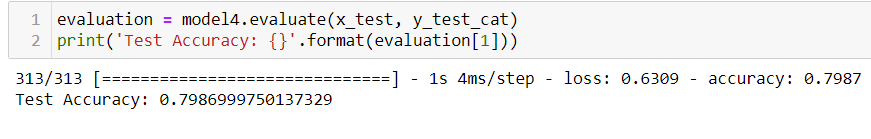

Now the accuracy boosted to 79.86% from 76% which is nice. Thanks to few additional layers and also we increased drop out with the additional layers. Also you can see here we used different initializer, this I got from machine learning mastery tutorial and it works well.

## Model 5: Adding Batch Normalization

Batch normalization works just the same way as we normalize the input data where we divided the x_train/255. What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions. Our input layer is lucky enough to have everything in same scale why not the rest of the layers? 

This is what exactly we do in batch normalization, when ever we passs the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.

Also the kind of normalization we use is batch normalization which means we compute mean and varience for each mini batch not the whole data.

If you want to know more about batch normalization I found very good article [here](http://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c).

In [ ]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

In [ ]:
pd.DataFrame(history5.history).plot()

In [ ]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

### Adding batch normalizaton yeilds very good results and we are able to get 87.3% validation accuracy. Which is really good. Batch normalization made our average results into excellent results. Still there is a lot of improvement scope. I just refered to Benchmarks.ai website and I was shocked to see 99.37. So there is defnelty a lot we can do.

## Model 6: Image augmentation


When we discussed on how to reduce overfitting we agreed that adding more data will reduce overfitting. Even when our model doesnt overfits, its very good idea to add more data if you can. But collecting data is very tough and also data preprocessing is not as fancy it sounds. But what if we can genrate data from our existing data. We already have 60K images and we can generate lots and lots of images out of it

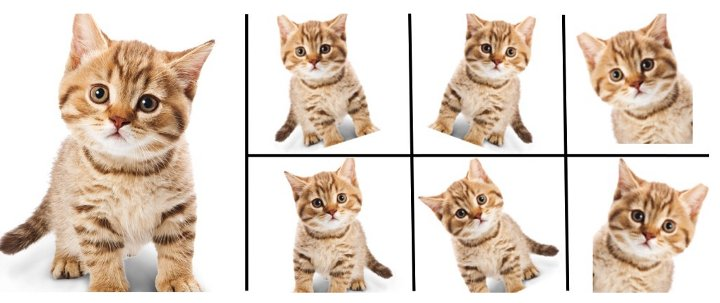

https://www.kdnuggets.com/wp-content/uploads/cats-data-augmentation.jpg

See from just one image we now genearated 6 images just by changing the inclanation of the subject. Ofcourse it might looks same image for our eyes but for machine it is a different image, since the pixel values changes. We can play with color of the image, focus of the image, shift of the image etc. Image augmentation really helps machine to understand that  a cat is a cat, irrespective of the color or image position.

To augmet the data we are using the ImageDataGenerator of tensorflow keras preprocessing library. 

Refer the [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for more details on ImageDataGenarator

In [ ]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train_cat)
steps = int(x_train.shape[0] / 64)
history6=model6.fit_generator(it_train,epochs=200,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))
# history6=model6.fit(x_train,y_train_cat,epochs=200,validation_data=(x_test,y_test_cat))

In [ ]:
evaluation = model6.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

Image augmentation will always helps model to genearalize more. We are now at 88% validation accuracy with 0.37 validation loss. Let us stop our exploration here and conclude the results. Later some other time we will explore the rest of the 12 percent accuracy!!

## End Results

88 % accuracy is not bad and there is lot to try, we have pretrained models, we have complex architectures. Also we can gather more data. If we have good computational resources we can play with batch size and learning rate. Which we will explor in other note books. 

This note book is a combination of multiple tutorials and different kaggle kernals. If you find this note books intresting run the code and play with parameters and see how it is behaving. If you know someother ways to improve accuracy beyond 87.8 please comment so that we can try. 

I read that using pretrained model will improve the accuracy a lot since the models already have certain filters or layers that are good at recognizing certain image. We will try that in a different notebook.

Please upvote if you like my work. Thank you:) - Kedar.